In [1]:
#Librairie
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from statsmodels.tsa.stattools import pacf
#time series xavier dupre

In [2]:
#fonction a posteriori
def posteriori(x):
    return np.exp(-b*np.abs(x)) * np.abs(x)**(a-1)

In [3]:
#Valeurs de départ
N = 500 #nombre d'itération

#Burn-in 
burnin = 0

#paramètres de la fonction a posteriori
a = 4
b = 7

In [4]:
#Thinning
thinning = 1

In [5]:
#Valeurs des intervalles
i_thinning = np.linspace(1,N//thinning - burnin-1,N//thinning - burnin)
print(len(i_thinning))
x_array = np.linspace(-2, 2.5, 100)
y_array = np.asarray( [posteriori(c) for c in x_array] )

500


In [6]:
def ChaineDeMarkov(x,thinning,burning,N,var):
    rejet = 0 #On initialise le rejet à 0 pour pouvoir compter combien de fois on a rejeter l'avancement
    if (thinning == 1): #Dans ce cas là on ne procède pas à un amincicement
        for i in range(1,N):
            y = np.sqrt(var)*float(np.random.normal(size=1)) + x[i-1] #On 
            p = np.minimum(posteriori(y) / posteriori(x[i-1]),1)
            test = np.random.binomial(1,p) #On test si on fais varier 
            if (test==1): #Si le resultat du test est 1 alors on 
                x.append(y)
            else: # sinon ... et par conséquent on incrémente le rejet de 1
                x.append(x[i-1]) #
                rejet += 1  
    else : #Dans ce cas là on va procéder à un amincicement de la chaine de Markov
        for i in range(1+thinning,N,thinning):
            y = np.sqrt(var)*float(np.random.normal(size=1)) + x[i//thinning - 1]
            p = np.minimum(posteriori(y) / posteriori(x[i//thinning - 1]),1)
            test = np.random.binomial(1,p)
            if (test==1):
                x.append(y)
            else:
                x.append(x[i//thinning - 1])
                rejet += 1
    print("Var = ", np.var(x)) #On affiche à l'utilisateur la variance de notre vecteur x
    print("E = ",np.mean(x))
    print("rejet = ", rejet) #On affiche à l'utilisateur la valeur de rejet
    x = x[burnin:]
    return x, rejet

In [7]:
def Metropolis(x,thinning,burning,N,var):
    rejet = 0 #On initialise le rejet à 0 pour pouvoir compter combien de fois on a rejeter l'avancement
    for i in range(1,N):
        y = np.sqrt(var)*float(np.random.normal(size=1)) + x[i-1] #On 
        p = np.minimum(posteriori(y) / posteriori(x[i-1]),1)
        test = np.random.binomial(1,p) #On test si on fais varier 
        if (test==1): #Si le resultat du test est 1 alors on 
            x.append(y)
        else: # sinon ... et par conséquent on incrémente le rejet de 1
            x.append(x[i-1]) #
            rejet += 1  
    print("Var = ", np.var(x)) #On affiche à l'utilisateur la variance de notre vecteur x
    print("E = ",np.mean(x))
    print("rejet = ", rejet) #On affiche à l'utilisateur la valeur de rejet
    y = []
    for i in range(len(x)):
        if i%thinning == 0:
            y.append(x[i])
    x1 = y[burnin:]
    return x1, rejet

In [8]:
#creation première Chaine

#première itération de la chaine de Markov
x = [0.1] #On initialise la première itération de notre chaine de Markov à 0.1
var = 5

g, rejet1 = Metropolis(x,thinning, burnin, N, var) #On crée la première chaine de Markov qui va nous permettre de créer 
#la seconde sur laquelle nous allons travailler

Var =  0.4531744731193633
E =  0.09756165316205684
rejet =  371


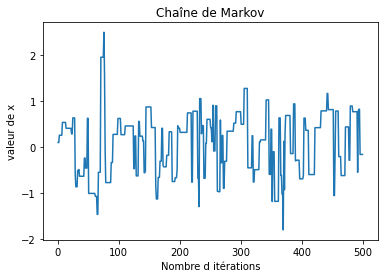

In [9]:
#Graphique de la chaine de Markov
plt.plot(i_thinning,g)

plt.title('Chaîne de Markov')
plt.xlabel("Nombre d itérations")
plt.ylabel("valeur de x")
plt.show()

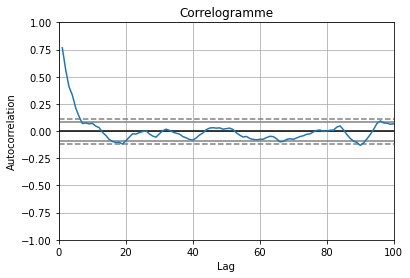

In [10]:
#Corrélogramme
df1 = pd.DataFrame(g) #On crée un data frame qui va nous permettre d'utiliser la fonction 
#pd.plotting.autocorrelation_plot

#print(df)

pd.plotting.autocorrelation_plot(df1)
plt.axis([0, 100, -1, 1 ]) #On afficher les 100 premiers lag
plt.title('Correlogramme')
plt.show()

In [11]:
#Effective sample size
pcor1 = pacf(g) #Autocorrelation de la chaine de Markov

ESS1 = N/(1+2*np.sum((pcor1))) #On utilise la formule de l'Effective sample size

print("ESS1 = ",ESS1)

print(np.mean(g))
print(np.var(g))

ESS1 =  131.46498902847597
0.09756165316205684
0.4531744731193633


/Users/alexandrecancel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


In [12]:
#Creation Chaine de Markov à partir de la moyenne de la première
h, rejet = Metropolis([np.mean(g)],thinning,burnin,N, np.var(g)) #On crée la seconde Chaine de Markov à partir de la moyenne 
#de la première

Var =  0.3954853725323328
E =  -0.06570396276919738
rejet =  220


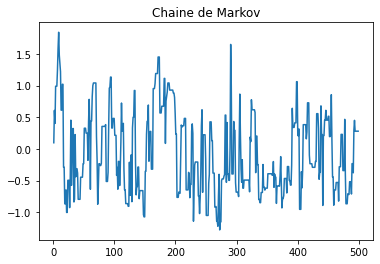

In [13]:
#Graphique de la chaine de Markov
plt.plot(i_thinning,h)

plt.title('Chaine de Markov')
plt.show()

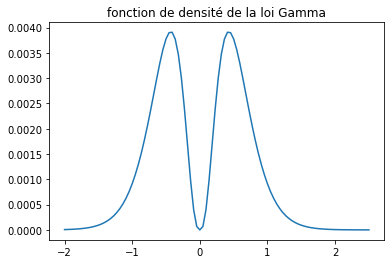

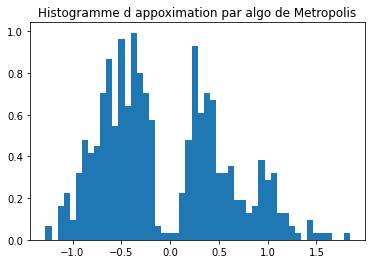

In [14]:
#Fonction de répartition
plt.plot(x_array,y_array)
plt.title("fonction de densité de la loi Gamma")
plt.show()
plt.hist(h, bins=50,density=1)

plt.title("Histogramme d appoximation par algo de Metropolis")
plt.show()

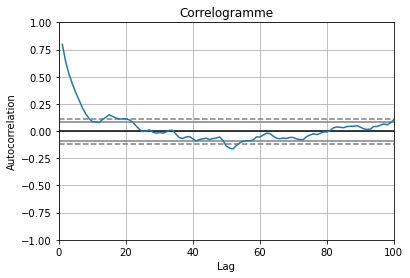

In [15]:
#Corrélogramme
df = pd.DataFrame(h) #On crée un data frame qui va nous permettre d'utiliser la fonction 
#pd.plotting.autocorrelation_plot

#print(df)

pd.plotting.autocorrelation_plot(df)
plt.axis([0, 100, -1, 1 ]) #On afficher les 100 premiers lag
plt.title('Correlogramme')
plt.show()

In [16]:
#Effective sample size
pcor = pacf(h) #Autocorrelation de la chaine de Markov

ESS = N/(1+2*np.sum((pcor))) #On utilise la formule de l'Effective sample size

print("ESS = ",ESS)

ESS =  111.01824543279464


/Users/alexandrecancel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
